<a href="https://colab.research.google.com/github/ARYANSRIVATSAVA/Projects/blob/main/Credit_card_default_customer_Machine_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv("/content/train (2).csv")
data.head()

,customer_id,limit_bal,sex,education,marriage,age,pay_1,pay_2,pay_3,pay_4,...,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,default_oct
0,1,1500,2.0,1.0,2.0,23.0,0.0,0.0,0.0,2.0,...,1463,938.0,698.0,75,150,86,0,50.0,50.0,yes
1,2,8500,2.0,2.0,2.0,29.0,0.0,0.0,0.0,0.0,...,8364,8275.0,8425.0,300,400,315,300,325.0,305.0,no
2,3,1000,1.0,1.0,2.0,22.0,0.0,0.0,0.0,0.0,...,933,772.0,794.0,150,150,150,24,105.0,110.0,no
3,4,10500,1.0,1.0,1.0,31.0,0.0,0.0,0.0,0.0,...,7190,7229.0,7340.0,255,260,258,260,265.0,307.0,no
4,5,10500,2.0,2.0,1.0,44.0,0.0,0.0,0.0,0.0,...,3558,3592.0,3496.0,180,155,145,130,135.0,200.0,no


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24001 entries, 0 to 24000
Data columns (total 25 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   customer_id  24001 non-null  int64  
 1   limit_bal    24001 non-null  int64  
 2   sex          24001 non-null  float64
 3   education    24001 non-null  float64
 4   marriage     24001 non-null  float64
 5   age          24001 non-null  float64
 6   pay_1        24001 non-null  float64
 7   pay_2        24001 non-null  float64
 8   pay_3        24001 non-null  float64
 9   pay_4        24001 non-null  float64
 10  pay_5        23819 non-null  float64
 11  pay_6        22790 non-null  float64
 12  bill_amt1    24001 non-null  int64  
 13  bill_amt2    24001 non-null  int64  
 14  bill_amt3    24001 non-null  int64  
 15  bill_amt4    24001 non-null  int64  
 16  bill_amt5    23819 non-null  float64
 17  bill_amt6    22790 non-null  float64
 18  pay_amt1     24001 non-null  int64  
 19  pay_

In [ ]:
#data = data.drop(columns = ['pay_4','pay_5','pay_6','customer_id','pay_amt4','pay_amt5','pay_amt6','bill_amt4','bill_amt5','bill_amt6'])

# Columns can be dropped accordingly after checking the feature importances of the data using the prediction model

In [ ]:
data = data.drop(columns = ['customer_id'])

In [ ]:
data.describe()

,limit_bal,sex,education,marriage,age,pay_1,pay_2,pay_3,pay_4,pay_5,...,bill_amt3,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6
count,24001.000000,24001.000000,24001.000000,24001.000000,24001.000000,24001.000000,24001.000000,24001.000000,24001.000000,23819.000000,...,24001.000000,24001.000000,23819.000000,22790.000000,24001.000000,24001.000000,24001.000000,24001.000000,23819.000000,22790.000000
mean,8351.302029,1.604058,1.856839,1.551644,35.498438,-0.015874,-0.132119,-0.166201,-0.215824,-0.263403,...,2359.795592,2175.804383,2024.383559,1960.335981,281.079955,298.237073,263.109704,243.367943,238.731139,256.517069
std,6475.592450,0.489062,0.792152,0.522663,9.222021,1.123554,1.199237,1.196802,1.173350,1.135120,...,3499.639871,3244.170936,3063.487512,3015.469078,846.819525,1215.481369,899.406651,782.138847,779.341974,861.106314
min,500.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-3075.000000,-8500.000000,-4066.000000,-10452.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2500.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,130.000000,116.000000,90.000000,62.000000,49.000000,41.000000,19.000000,15.000000,12.000000,6.000000
50%,7000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1007.000000,953.000000,906.000000,855.500000,105.000000,100.000000,90.000000,75.000000,75.000000,75.000000
75%,12000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,3015.000000,2752.000000,2510.500000,2466.000000,250.000000,250.000000,227.000000,200.000000,200.000000,200.000000
max,50000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,83204.000000,44579.000000,46358.000000,48083.000000,43677.000000,84212.000000,44802.000000,31050.000000,21326.000000,26433.000000


In [ ]:
data.isnull().sum()

limit_bal         0
sex               0
education         0
marriage          0
age               0
pay_1             0
pay_2             0
pay_3             0
pay_4             0
pay_5           182
pay_6          1211
bill_amt1         0
bill_amt2         0
bill_amt3         0
bill_amt4         0
bill_amt5       182
bill_amt6      1211
pay_amt1          0
pay_amt2          0
pay_amt3          0
pay_amt4          0
pay_amt5        182
pay_amt6       1211
default_oct       0
dtype: int64

In [ ]:

missing_proportion = data.isnull().sum() / len(data)

columns_to_process = ['pay_5', 'pay_6', 'bill_amt5', 'bill_amt6', 'pay_amt5', 'pay_amt6']

columns_to_remove = []
columns_to_impute = []

for col in columns_to_process:
    if missing_proportion[col] > 0.1: # if missing values in a columns are more than 10% of total values
        columns_to_remove.append(col)
    else:
        columns_to_impute.append(col)

if columns_to_remove:
    data.drop(columns_to_remove, axis=1, inplace=True)
    print("Columns removed:", columns_to_remove)

# Impute missing values in remaining columns
for col in columns_to_impute:
    # Here you can choose different imputation methods like mean, median, mode, or others
    # For simplicity, let's use median imputation
    median_value = data[col].median()

#The median is less sensitive to outliers and extreme values compared to the mean

#The median is a better measure of central tendency for skewed distributions because it doesn't assume the data is symmetric, unlike the mean
    data[col].fillna(median_value, inplace=True)
    print("Missing values in", col, "imputed with median value:", median_value)

# Now you have a DataFrame 'df' with missing values handled


Missing values in pay_5 imputed with median value: 0.0
Missing values in pay_6 imputed with median value: 0.0
Missing values in bill_amt5 imputed with median value: 906.0
Missing values in bill_amt6 imputed with median value: 855.5
Missing values in pay_amt5 imputed with median value: 75.0
Missing values in pay_amt6 imputed with median value: 75.0


In [ ]:
data.head(5)

,limit_bal,sex,education,marriage,age,pay_1,pay_2,pay_3,pay_4,pay_5,...,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,default_oct
0,1500,2.0,1.0,2.0,23.0,0.0,0.0,0.0,2.0,2.0,...,1463,938.0,698.0,75,150,86,0,50.0,50.0,yes
1,8500,2.0,2.0,2.0,29.0,0.0,0.0,0.0,0.0,0.0,...,8364,8275.0,8425.0,300,400,315,300,325.0,305.0,no
2,1000,1.0,1.0,2.0,22.0,0.0,0.0,0.0,0.0,0.0,...,933,772.0,794.0,150,150,150,24,105.0,110.0,no
3,10500,1.0,1.0,1.0,31.0,0.0,0.0,0.0,0.0,0.0,...,7190,7229.0,7340.0,255,260,258,260,265.0,307.0,no
4,10500,2.0,2.0,1.0,44.0,0.0,0.0,0.0,0.0,0.0,...,3558,3592.0,3496.0,180,155,145,130,135.0,200.0,no


In [ ]:
data.isnull().sum()

limit_bal      0
sex            0
education      0
marriage       0
age            0
pay_1          0
pay_2          0
pay_3          0
pay_4          0
pay_5          0
pay_6          0
bill_amt1      0
bill_amt2      0
bill_amt3      0
bill_amt4      0
bill_amt5      0
bill_amt6      0
pay_amt1       0
pay_amt2       0
pay_amt3       0
pay_amt4       0
pay_amt5       0
pay_amt6       0
default_oct    0
dtype: int64

In [ ]:
data.duplicated().sum()

25

In [ ]:
data = data.drop_duplicates()

In [ ]:
data

,limit_bal,sex,education,marriage,age,pay_1,pay_2,pay_3,pay_4,pay_5,...,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,default_oct
0,1500,2.0,1.0,2.0,23.0,0.0,0.0,0.0,2.0,2.0,...,1463,938.0,698.0,75,150,86,0,50.0,50.0,yes
1,8500,2.0,2.0,2.0,29.0,0.0,0.0,0.0,0.0,0.0,...,8364,8275.0,8425.0,300,400,315,300,325.0,305.0,no
2,1000,1.0,1.0,2.0,22.0,0.0,0.0,0.0,0.0,0.0,...,933,772.0,794.0,150,150,150,24,105.0,110.0,no
3,10500,1.0,1.0,1.0,31.0,0.0,0.0,0.0,0.0,0.0,...,7190,7229.0,7340.0,255,260,258,260,265.0,307.0,no
4,10500,2.0,2.0,1.0,44.0,0.0,0.0,0.0,0.0,0.0,...,3558,3592.0,3496.0,180,155,145,130,135.0,200.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23996,1500,2.0,2.0,2.0,27.0,2.0,-1.0,0.0,0.0,-1.0,...,73,73.0,1402.0,149,73,0,73,1402.0,55.0,yes
23997,7000,1.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,0.0,...,3009,2946.0,2932.0,250,110,115,115,105.0,100.0,no
23998,8000,1.0,1.0,2.0,41.0,0.0,0.0,0.0,0.0,2.0,...,2503,2457.0,2616.0,100,100,300,0,210.0,100.0,no
23999,1000,2.0,3.0,1.0,50.0,-1.0,-1.0,-1.0,-1.0,-2.0,...,0,0.0,0.0,187,345,14,0,0.0,0.0,yes


['yes' 'no']


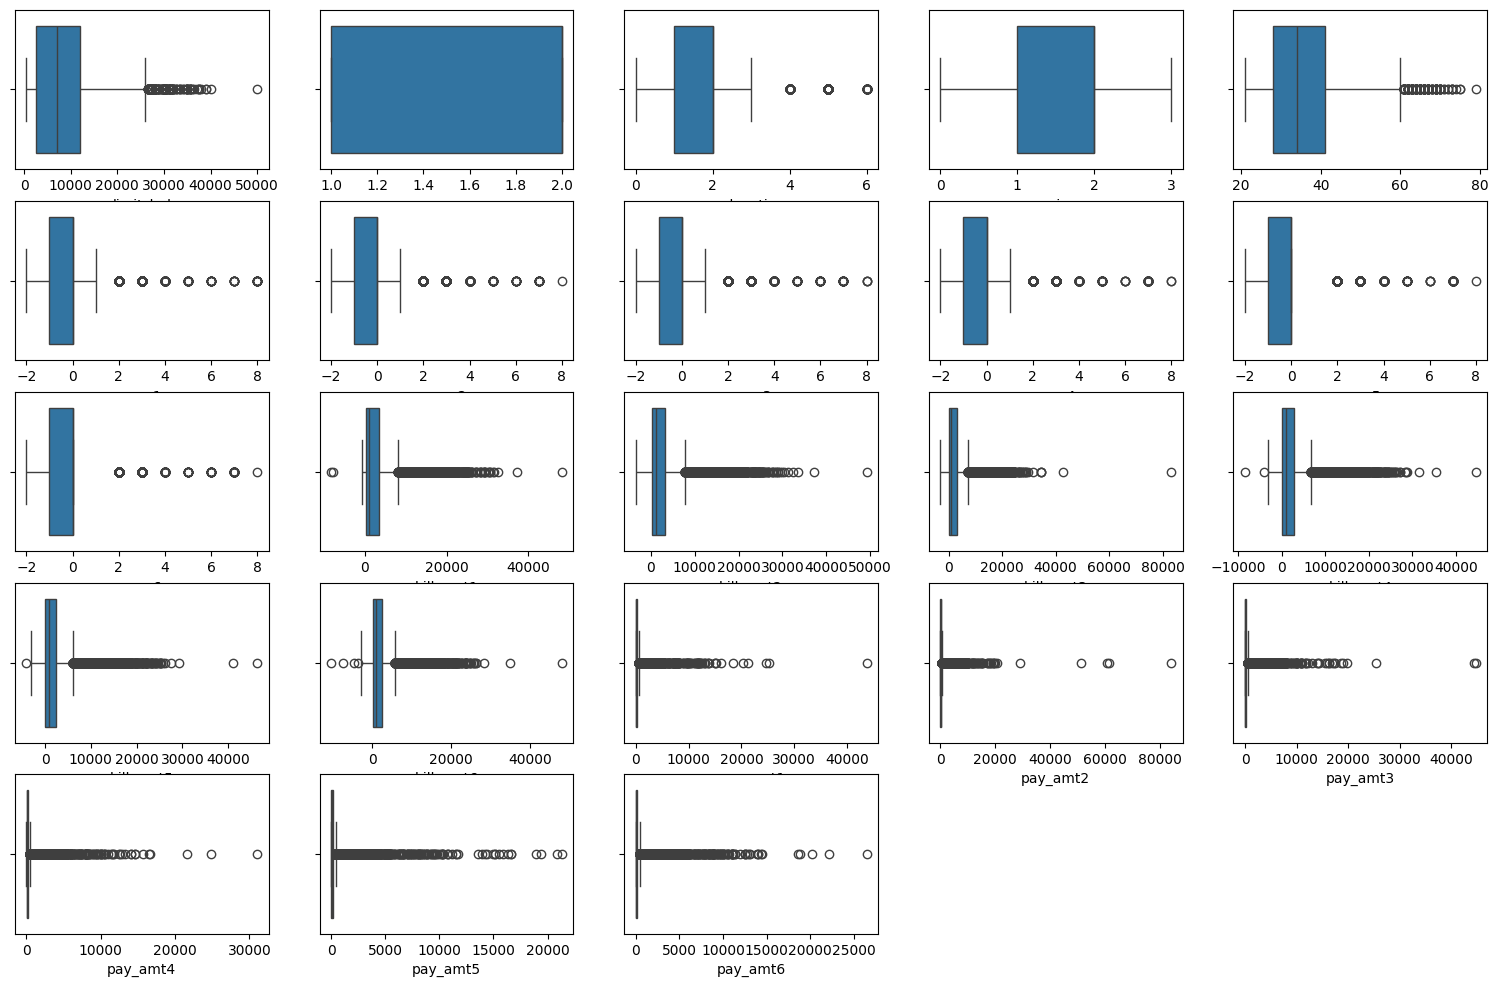

In [ ]:
from scipy import stats
num_cols = data.select_dtypes('number')
cat_cols = data.select_dtypes('object')
for c in cat_cols.columns:
    print(cat_cols[c].unique())
i = 1
plt.figure(figsize=(19, 12))
for c in num_cols.columns:
    plt.subplot(5, 5, i)
    sns.boxplot(x=data[c])
    i+=1

In [ ]:
data = data[(np.abs(stats.zscore(num_cols)) < 3).all(axis=1)] #Removing outliers.

In [ ]:
data

,limit_bal,sex,education,marriage,age,pay_1,pay_2,pay_3,pay_4,pay_5,...,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,default_oct
0,1500,2.0,1.0,2.0,23.0,0.0,0.0,0.0,2.0,2.0,...,1463,938.0,698.0,75,150,86,0,50.0,50.0,yes
1,8500,2.0,2.0,2.0,29.0,0.0,0.0,0.0,0.0,0.0,...,8364,8275.0,8425.0,300,400,315,300,325.0,305.0,no
2,1000,1.0,1.0,2.0,22.0,0.0,0.0,0.0,0.0,0.0,...,933,772.0,794.0,150,150,150,24,105.0,110.0,no
3,10500,1.0,1.0,1.0,31.0,0.0,0.0,0.0,0.0,0.0,...,7190,7229.0,7340.0,255,260,258,260,265.0,307.0,no
4,10500,2.0,2.0,1.0,44.0,0.0,0.0,0.0,0.0,0.0,...,3558,3592.0,3496.0,180,155,145,130,135.0,200.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23995,12500,2.0,3.0,1.0,50.0,-2.0,-2.0,-2.0,-2.0,-2.0,...,0,1980.0,1019.0,408,0,0,1981,1019.0,1635.0,no
23996,1500,2.0,2.0,2.0,27.0,2.0,-1.0,0.0,0.0,-1.0,...,73,73.0,1402.0,149,73,0,73,1402.0,55.0,yes
23997,7000,1.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,0.0,...,3009,2946.0,2932.0,250,110,115,115,105.0,100.0,no
23998,8000,1.0,1.0,2.0,41.0,0.0,0.0,0.0,0.0,2.0,...,2503,2457.0,2616.0,100,100,300,0,210.0,100.0,no


In [ ]:
x = data.drop(columns = ['default_oct'])
x

,limit_bal,sex,education,marriage,age,pay_1,pay_2,pay_3,pay_4,pay_5,...,bill_amt3,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6
0,1500,2.0,1.0,2.0,23.0,0.0,0.0,0.0,2.0,2.0,...,1482,1463,938.0,698.0,75,150,86,0,50.0,50.0
1,8500,2.0,2.0,2.0,29.0,0.0,0.0,0.0,0.0,0.0,...,8300,8364,8275.0,8425.0,300,400,315,300,325.0,305.0
2,1000,1.0,1.0,2.0,22.0,0.0,0.0,0.0,0.0,0.0,...,896,933,772.0,794.0,150,150,150,24,105.0,110.0
3,10500,1.0,1.0,1.0,31.0,0.0,0.0,0.0,0.0,0.0,...,7077,7190,7229.0,7340.0,255,260,258,260,265.0,307.0
4,10500,2.0,2.0,1.0,44.0,0.0,0.0,0.0,0.0,0.0,...,3533,3558,3592.0,3496.0,180,155,145,130,135.0,200.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23995,12500,2.0,3.0,1.0,50.0,-2.0,-2.0,-2.0,-2.0,-2.0,...,0,0,1980.0,1019.0,408,0,0,1981,1019.0,1635.0
23996,1500,2.0,2.0,2.0,27.0,2.0,-1.0,0.0,0.0,-1.0,...,147,73,73.0,1402.0,149,73,0,73,1402.0,55.0
23997,7000,1.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,0.0,...,3146,3009,2946.0,2932.0,250,110,115,115,105.0,100.0
23998,8000,1.0,1.0,2.0,41.0,0.0,0.0,0.0,0.0,2.0,...,2242,2503,2457.0,2616.0,100,100,300,0,210.0,100.0


In [ ]:
y = data['default_oct']
y = y.replace({'yes': 1, 'no' : 0}).astype(int)
data['default_oct'] = y

<ipython-input-18-9f3f7c0e1ebe>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['default_oct'] = y


In [ ]:
y.value_counts()

0    16398
1     4743
Name: default_oct, dtype: int64

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
sm = SMOTE(random_state=42)
X_sm, y_sm = sm.fit_resample(x, y)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size = 0.20)
print("Variables in Train Set : {} & Test Set : {}".format(len(X_train), len(X_test)))

Variables in Train Set : 26236 & Test Set : 6560


In [ ]:
len(X_train)

26236

In [ ]:
len(y_train)

26236

In [ ]:
import xgboost as xgb

model = xgb.XGBClassifier(objective='reg:squarederror', learning_rate = 0.1, max_depth = 5, n_estimators = 100)
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, objective='reg:squarederror', ...)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

y_pred = model.predict(X_test)
print("Accuracy {:.2f} %".format( 100 * accuracy_score(y_pred, y_test)))


Accuracy 86.75 %


Classification Report :- 
               precision    recall  f1-score   support

           0       0.83      0.94      0.88      3343
           1       0.92      0.80      0.86      3217

    accuracy                           0.87      6560
   macro avg       0.87      0.87      0.87      6560
weighted avg       0.87      0.87      0.87      6560



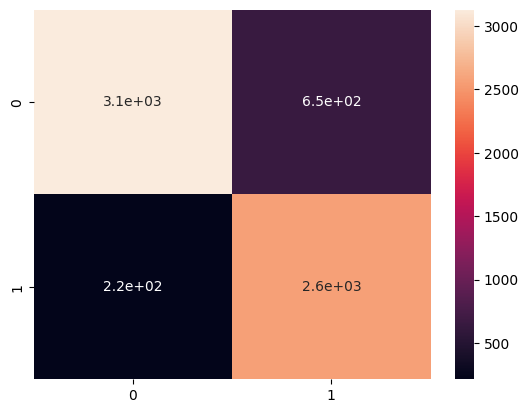

In [ ]:
cm = confusion_matrix(y_pred, y_test)
sns.heatmap(cm, annot=True);
print("Classification Report :- \n",classification_report(y_test, y_pred))

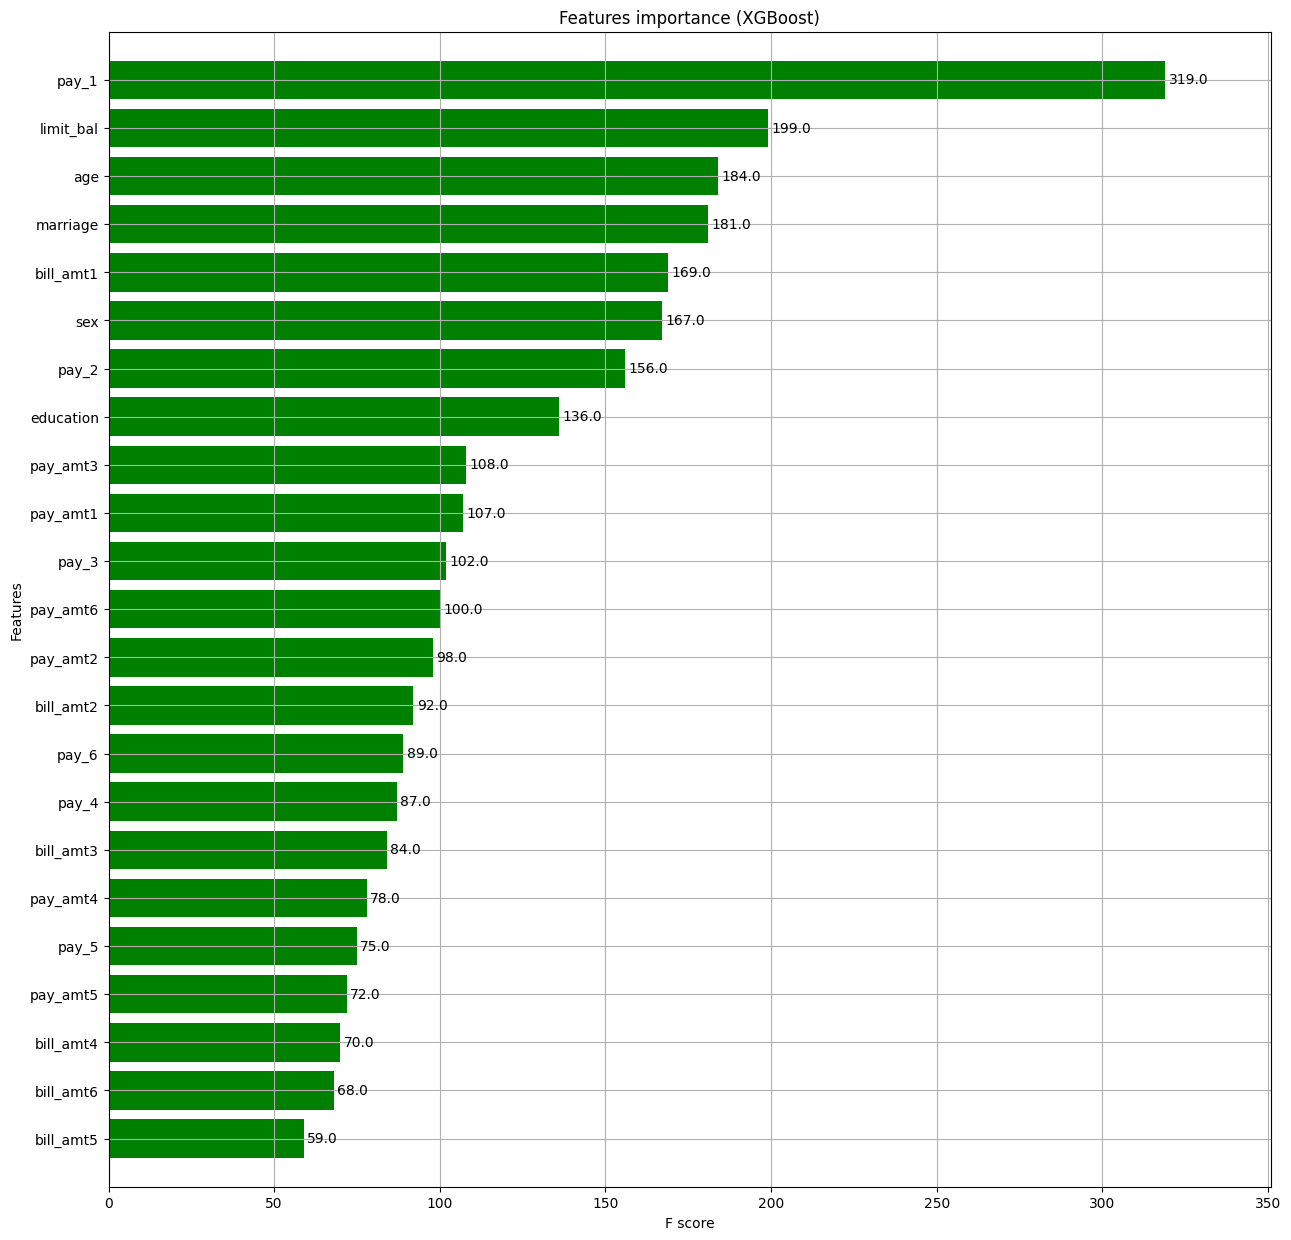

In [ ]:
fig, (ax) = plt.subplots(ncols=1, figsize=(15,15))
xgb.plot_importance(model, height=0.8, title="Features importance (XGBoost)", ax=ax, color="green")
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train,y_train)

RandomForestClassifier()

In [ ]:
train_class_preds = rf_clf.predict(X_train)
test_class_preds = rf_clf.predict(X_test)

In [ ]:
train_accuracy_rf = accuracy_score(train_class_preds,y_train)
test_accuracy_rf = accuracy_score(test_class_preds,y_test)

print("The accuracy on train data is ", train_accuracy_rf)
print("The accuracy on test data is ", test_accuracy_rf)

The accuracy on train data is  0.9996569599024242
The accuracy on test data is  0.8777439024390243


In [ ]:
param_grid = {'n_estimators': [100,150,200], 'max_depth': [10,20,30]}

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score, confusion_matrix, roc_curve, auc

from sklearn.svm import SVC

In [ ]:
grid_rf_clf = GridSearchCV(RandomForestClassifier(), param_grid, scoring = 'accuracy', n_jobs = -1, verbose = 3, cv = 3)
grid_rf_clf.fit(X_train, y_train)

Fitting 3 folds for each of 9 candidates, totalling 27 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [10, 20, 30],
                         'n_estimators': [100, 150, 200]},
             scoring='accuracy', verbose=3)

In [ ]:
grid_rf_clf.best_score_

0.8714363714027172

In [ ]:
num_cols

,limit_bal,sex,education,marriage,age,pay_1,pay_2,pay_3,pay_4,pay_5,...,bill_amt3,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6
0,1500,2.00,1.00,2.00,23.00,0.00,0.00,0.00,2.00,2.00,...,1482,1463,938.00,698.00,75,150,86,0,50.00,50.00
1,8500,2.00,2.00,2.00,29.00,0.00,0.00,0.00,0.00,0.00,...,8300,8364,8275.00,8425.00,300,400,315,300,325.00,305.00
2,1000,1.00,1.00,2.00,22.00,0.00,0.00,0.00,0.00,0.00,...,896,933,772.00,794.00,150,150,150,24,105.00,110.00
3,10500,1.00,1.00,1.00,31.00,0.00,0.00,0.00,0.00,0.00,...,7077,7190,7229.00,7340.00,255,260,258,260,265.00,307.00
4,10500,2.00,2.00,1.00,44.00,0.00,0.00,0.00,0.00,0.00,...,3533,3558,3592.00,3496.00,180,155,145,130,135.00,200.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23996,1500,2.00,2.00,2.00,27.00,2.00,-1.00,0.00,0.00,-1.00,...,147,73,73.00,1402.00,149,73,0,73,1402.00,55.00
23997,7000,1.00,2.00,2.00,34.00,0.00,0.00,0.00,0.00,0.00,...,3146,3009,2946.00,2932.00,250,110,115,115,105.00,100.00
23998,8000,1.00,1.00,2.00,41.00,0.00,0.00,0.00,0.00,2.00,...,2242,2503,2457.00,2616.00,100,100,300,0,210.00,100.00
23999,1000,2.00,3.00,1.00,50.00,-1.00,-1.00,-1.00,-1.00,-2.00,...,345,0,0.00,0.00,187,345,14,0,0.00,0.00


Impactful optimizations for accuracy

1. Check the skewness of each feature followed by transforming each feature with log or box-cox transformation if the distribution of the feature is skewed.

2. Based on feature importances, new feaures such could be created.

     Example: bill_amount - pay_amount = balance_debt or due_to_be_paid -> new feature to be added to the table

In [ ]:
test_new = pd.read_csv('/content/test (3).csv')
test_new

,customer_id,limit_bal,sex,education,marriage,age,pay_1,pay_2,pay_3,pay_4,...,bill_amt3,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6
0,24002,10500,1.00,2.00,2.00,34.00,0.00,0.00,0.00,0.00,...,2080,1741,881.00,120.00,99,1053,724,884,120.00,24.00
1,24003,27500,2.00,5.00,2.00,52.00,-2.00,-2.00,-2.00,-2.00,...,12816,987,23.00,409.00,300,300,987,23,409.00,0.00
2,24004,27500,2.00,2.00,1.00,32.00,2.00,0.00,0.00,0.00,...,26775,27401,26533.00,7754.00,1054,1143,8381,700,215.00,7903.00
3,24005,9000,2.00,2.00,1.00,32.00,1.00,2.00,2.00,2.00,...,887,858,936.00,1169.00,0,150,0,100,250.00,100.00
4,24006,500,1.00,3.00,2.00,42.00,1.00,2.00,2.00,2.00,...,431,294,220.00,259.00,0,129,0,50,50.00,17.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5994,29996,17500,1.00,1.00,1.00,42.00,2.00,-1.00,-1.00,-1.00,...,33,33,33.00,1536.00,33,33,33,33,1536.00,41.00
5995,29997,10000,2.00,2.00,1.00,28.00,0.00,0.00,0.00,0.00,...,422,4852,5177.00,181.00,250,100,4450,325,4.00,75.00
5996,29998,3000,2.00,2.00,1.00,29.00,0.00,0.00,0.00,0.00,...,2856,2551,1210.00,264.00,109,114,71,8,21.00,1467.00
5997,29999,1500,1.00,3.00,2.00,37.00,1.00,2.00,2.00,0.00,...,1186,1231,1246.00,1263.00,69,0,84,50,75.00,25.00


In [ ]:
test_new = test_new.drop(columns = ['customer_id'])

In [ ]:

missing_proportion = test_new.isnull().sum() / len(test_new)

columns_to_process = num_cols

columns_to_remove = []
columns_to_impute = []

for col in columns_to_process:
    if missing_proportion[col] > 0.1: # if missing values in a columns are more than 10% of total values
        columns_to_remove.append(col)
    else:
        columns_to_impute.append(col)

if columns_to_remove:
    test_new.drop(columns_to_remove, axis=1, inplace=True)
    print("Columns removed:", columns_to_remove)

# Impute missing values in remaining columns
for col in columns_to_impute:
    # Here you can choose different imputation methods like mean, median, mode, or others
    # For simplicity, let's use median imputation
    median_value = test_new[col].median()
    test_new[col].fillna(median_value, inplace=True)
    print("Missing values in", col, "imputed with median value:", median_value)

# Now you have a DataFrame 'df' with missing values handled


Missing values in limit_bal imputed with median value: 7000.0
Missing values in sex imputed with median value: 2.0
Missing values in education imputed with median value: 2.0
Missing values in marriage imputed with median value: 2.0
Missing values in age imputed with median value: 34.0
Missing values in pay_1 imputed with median value: 0.0
Missing values in pay_2 imputed with median value: 0.0
Missing values in pay_3 imputed with median value: 0.0
Missing values in pay_4 imputed with median value: 0.0
Missing values in pay_5 imputed with median value: 0.0
Missing values in pay_6 imputed with median value: 0.0
Missing values in bill_amt1 imputed with median value: 1097.0
Missing values in bill_amt2 imputed with median value: 1065.0
Missing values in bill_amt3 imputed with median value: 991.0
Missing values in bill_amt4 imputed with median value: 949.0
Missing values in bill_amt5 imputed with median value: 894.0
Missing values in bill_amt6 imputed with median value: 835.0
Missing values i

In [ ]:
test_new.isnull().sum()

limit_bal    0
sex          0
education    0
marriage     0
age          0
pay_1        0
pay_2        0
pay_3        0
pay_4        0
pay_5        0
pay_6        0
bill_amt1    0
bill_amt2    0
bill_amt3    0
bill_amt4    0
bill_amt5    0
bill_amt6    0
pay_amt1     0
pay_amt2     0
pay_amt3     0
pay_amt4     0
pay_amt5     0
pay_amt6     0
dtype: int64

In [ ]:
test_preds = rf_clf.predict(test_new)

In [ ]:
pr_y = pd.DataFrame(test_preds)

In [ ]:
position = 0  # index of the column after which you want to insert the new column

# Generate the list of numbers
new_column_data = list(range(24002, 30001))

# Add the new column to the DataFrame at the specified position
pr_y.insert(position, 'new_column', new_column_data)


In [ ]:
pr_y = pr_y.rename(columns = {'new_column' : 'customer_id',0: 'pr_y'})

In [ ]:
pr_y

,customer_id,pr_y
0,24002,0
1,24003,0
2,24004,1
3,24005,0
4,24006,0
...,...,...
5994,29996,0
5995,29997,0
5996,29998,0
5997,29999,0


In [ ]:
pr_y.to_csv('predictions_Final.csv',index = False)

Additional basic exploratory data analysis

<Axes: >

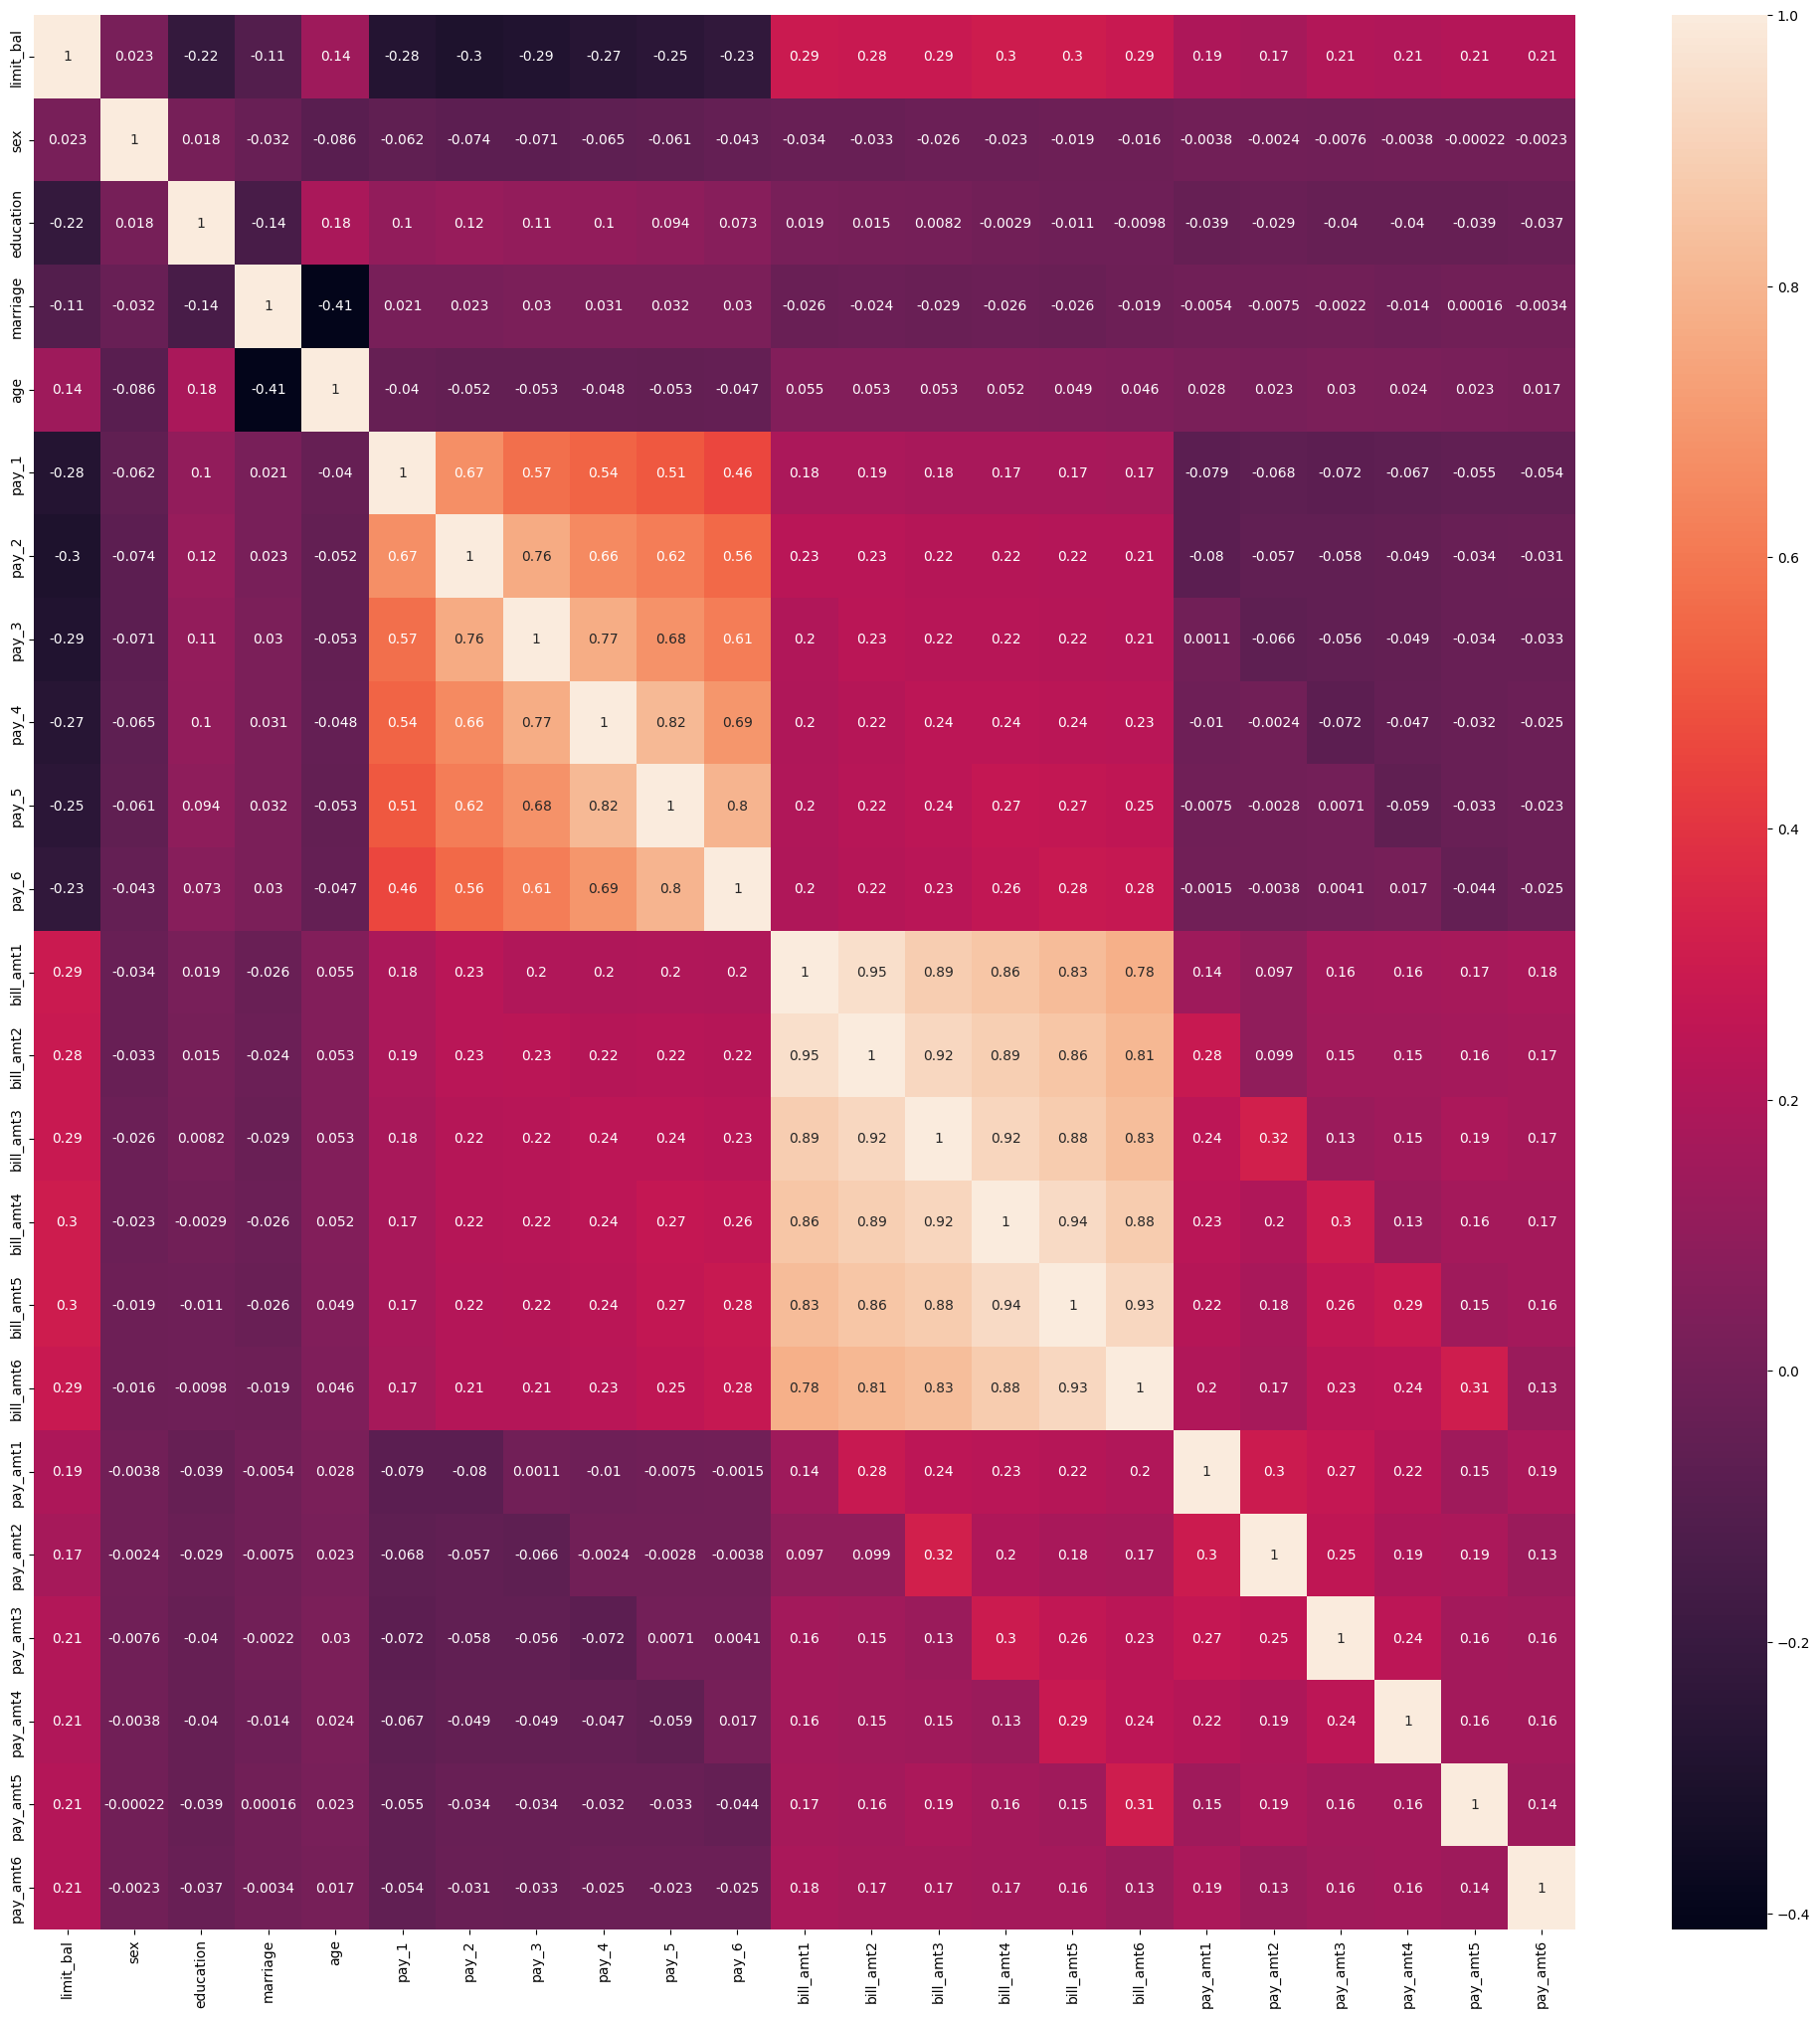

In [ ]:
plt.figure(figsize=(25,25))
sns.heatmap(num_cols.corr(), annot=True)

As shown above, the features BILL_AMT(1 TO 6) AND PAY(1 TO 6) are highly correlated.

Also it is clear that the features PAY(1 to 6) are negatively correlated to the feature 'LIMIT_BAL'.


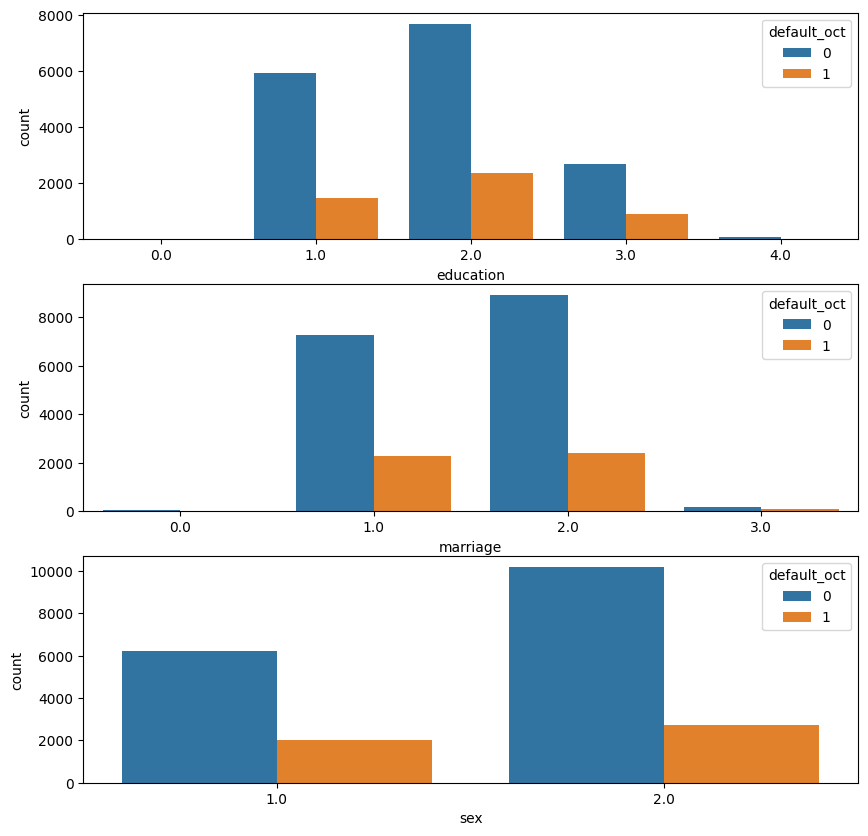

In [ ]:
plt.figure(figsize=(10,10))
plt.subplot(311)
sns.countplot(data, x='education', hue='default_oct');
plt.subplot(312)
sns.countplot(data, x='marriage', hue='default_oct');
plt.subplot(313)
sns.countplot(data, x='sex', hue='default_oct');

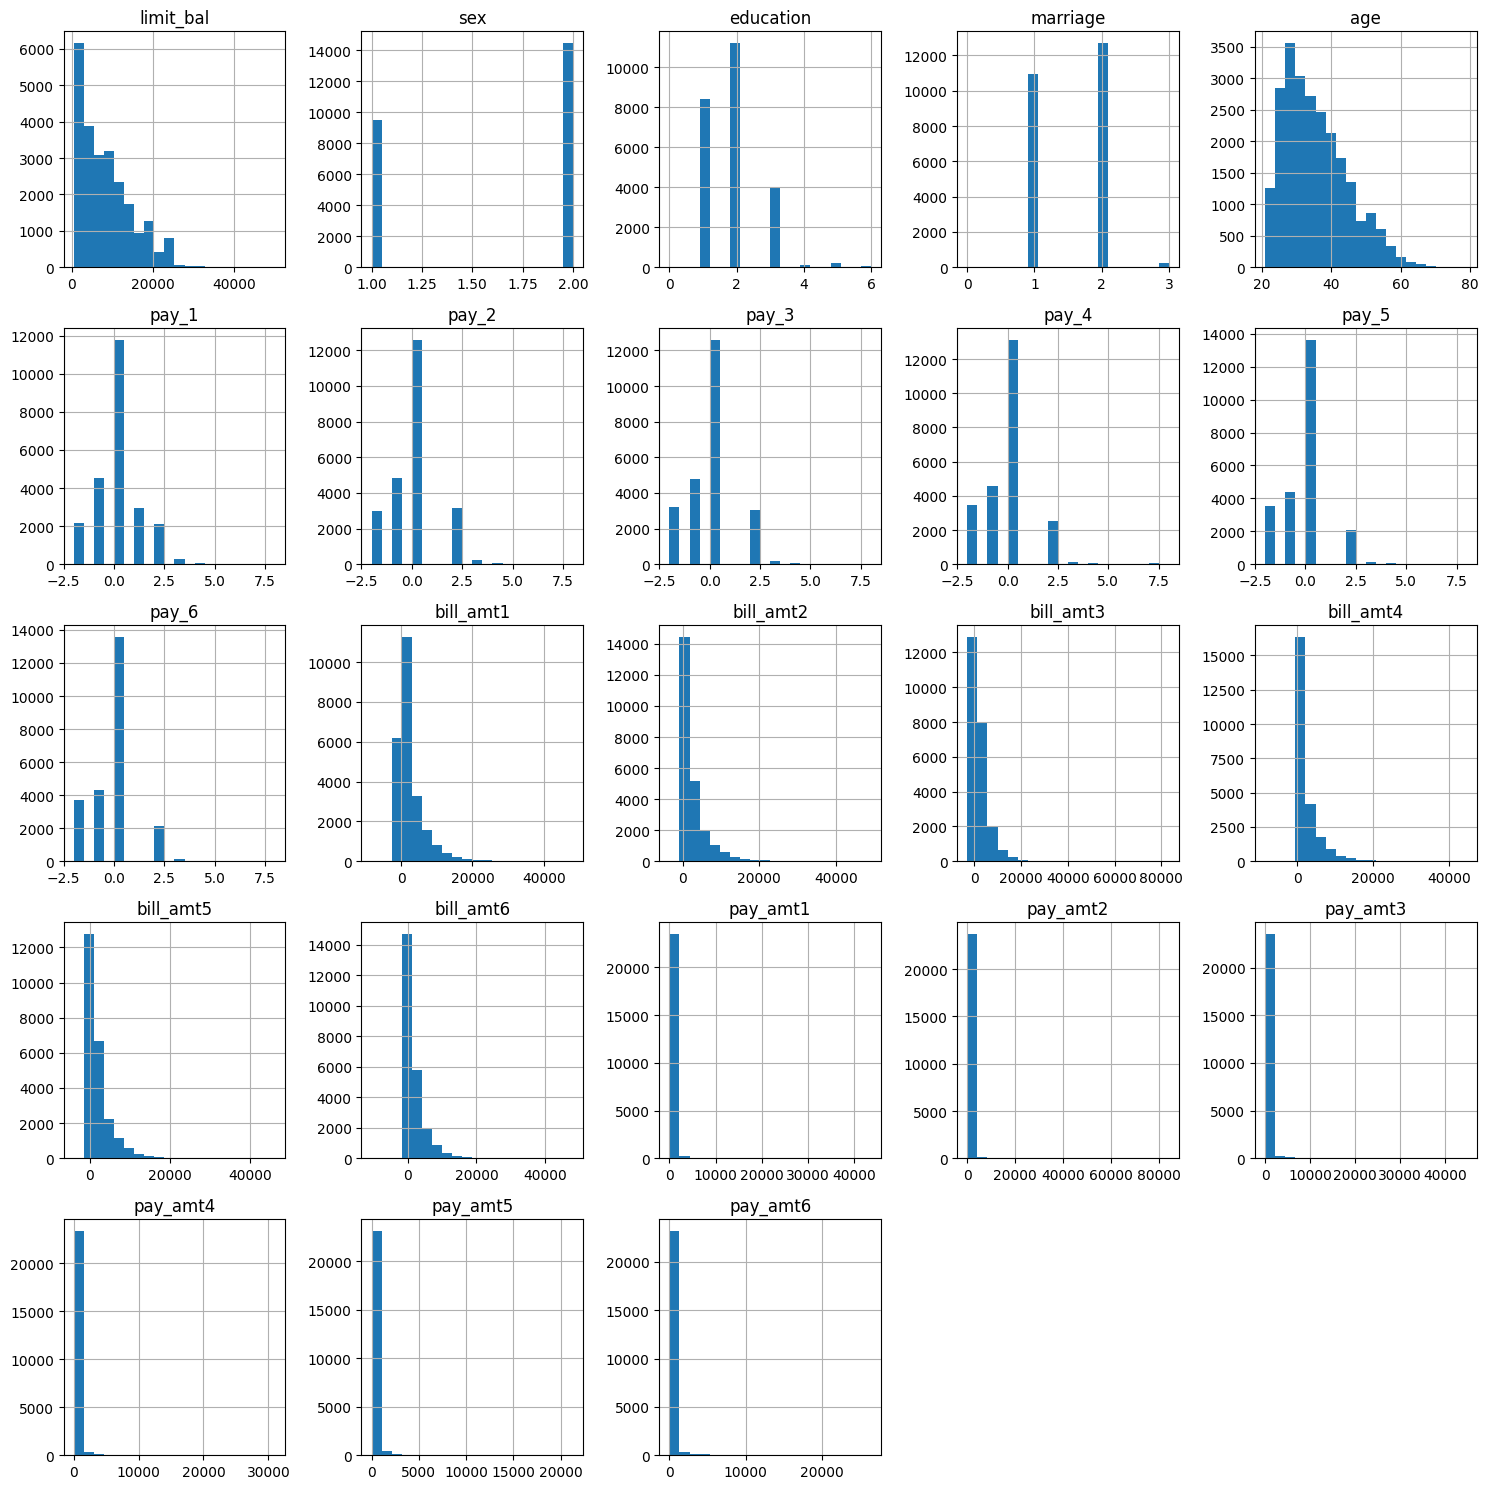

In [ ]:
num_cols.hist(bins=20, figsize=(15, 15))
plt.tight_layout()
plt.show()

There is skewness. Log or box cox transformation can make sense in terms of achieving better accuracy.

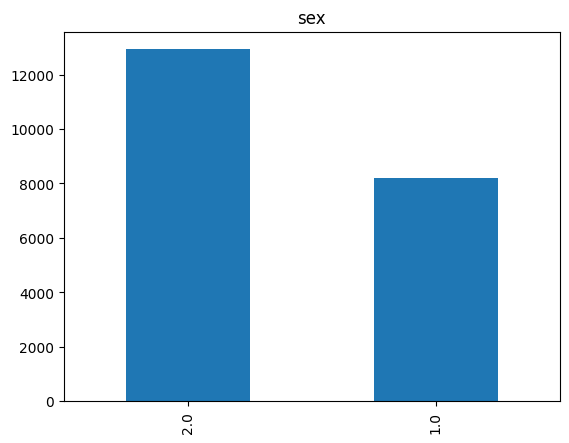

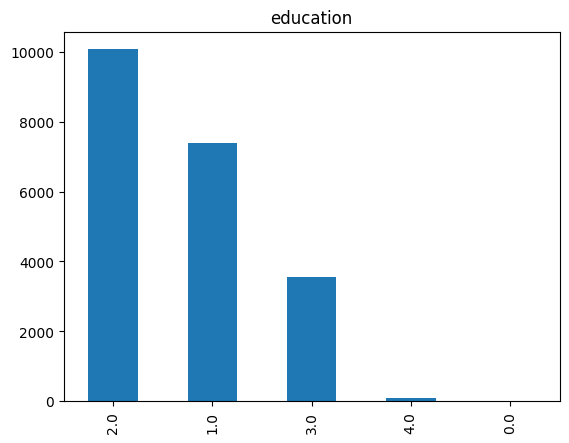

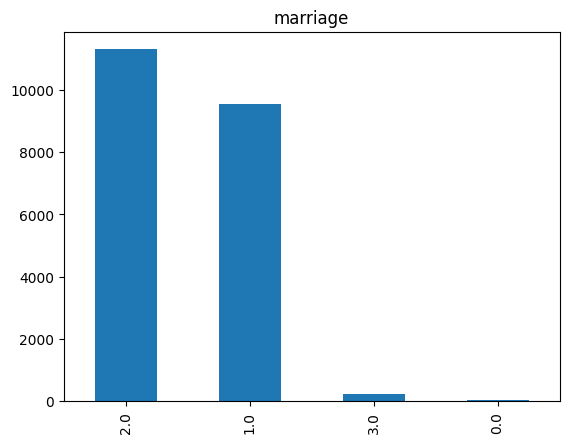

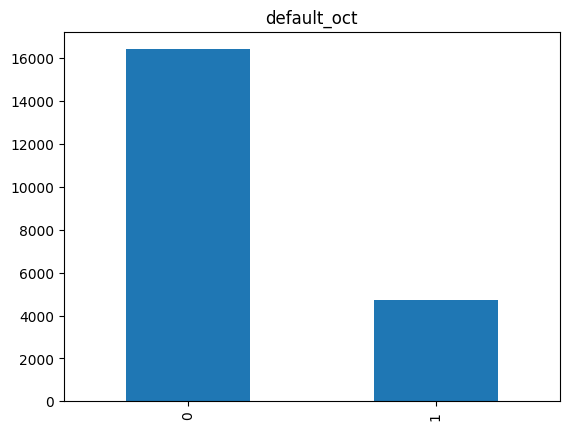

In [ ]:
categorical_cols = ['sex', 'education', 'marriage', 'default_oct']
for col in categorical_cols:
    data[col].value_counts().plot(kind='bar', title=col)
    plt.show()

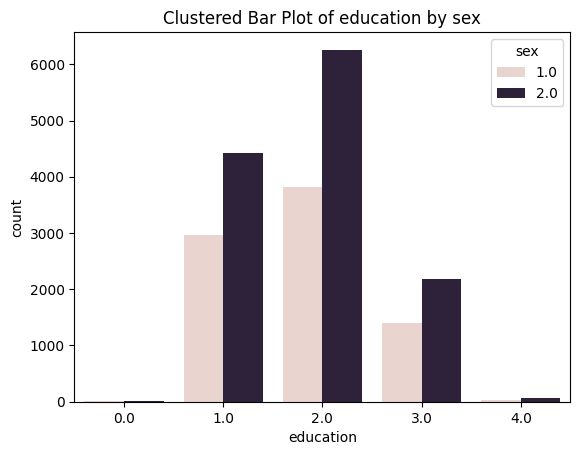

In [ ]:
# Two categorical variables to plot
cat_var1 = 'education'
cat_var2 = 'sex'

# Clustered bar plot
sns.countplot(data=data, x=data[cat_var1], hue=data[cat_var2], dodge=True)
plt.title(f'Clustered Bar Plot of {cat_var1} by {cat_var2}')
plt.show()